#### __Problem Statement:__

For the given dataset, perform EDA with visualization, formulate 2 questions on the given data and answer the same. Then proceed to to build an ensemble classifier using 3 ML algorithms and find out which algorithm best suits the dataset with respect to the accuracy of the algorithm.
#### __Procedure:__

   1. The dataset is to be analysed and preliminary data cleaning is to be done.
   2. Data exploration and feature engineering are to done for fine tuning of dataset.
   3. ML modelling and accuracy checking to find the optimal algorithm for the dataset.


#### __Questions to be answered at the end of EDA:__
   1. Text analysis based on common words used by Males & Females ?
   2. How significant are the color attributes used by the users ?


In [1]:
# Importing necessary packages 

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from collections import Counter


## __Preliminary Data Assessment__

In [2]:
twitter = pd.read_csv('Information.csv',encoding='latin-1')
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
twitter.shape

(20050, 26)

In [4]:
twitter.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [6]:
twitter.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
twitter.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [8]:
twitter['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
76289      18
4          17
9          16
5          16
6          15
65787      15
7          15
25         14
8          14
3609       14
16         14
75         14
18         13
12         13
26         13
29         12
117        12
97         12
10         12
114        11
13         10
14209      10
14         10
96         10
11         10
           ..
2777        1
728         1
25300       1
37353       1
39482       1
47823       1
109261      1
8908        1
51953       1
29430       1
112427      1
2809        1
35625       1
25380       1
21282       1
6939        1
4890        1
66328       1
43789       1
74508       1
6068        1
2825        1
67356       1
195335      1
19201       1
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

In [9]:
twitter['retweet_count'].value_counts()

0      19431
1        499
2         56
3         17
6          8
5          7
4          6
7          5
8          3
11         3
10         2
12         2
20         2
19         1
49         1
330        1
36         1
153        1
13         1
23         1
9          1
15         1
Name: retweet_count, dtype: int64

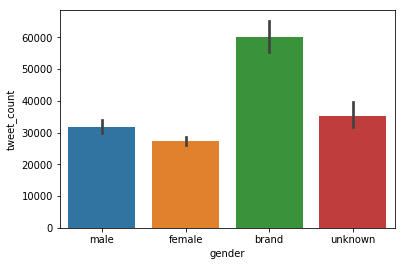

In [10]:
sns.barplot (x = 'gender', y = 'tweet_count',data = twitter)

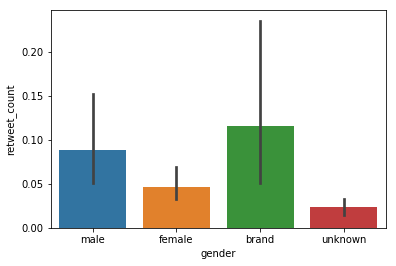

In [11]:
sns.barplot (x = 'gender', y = 'retweet_count',data = twitter)

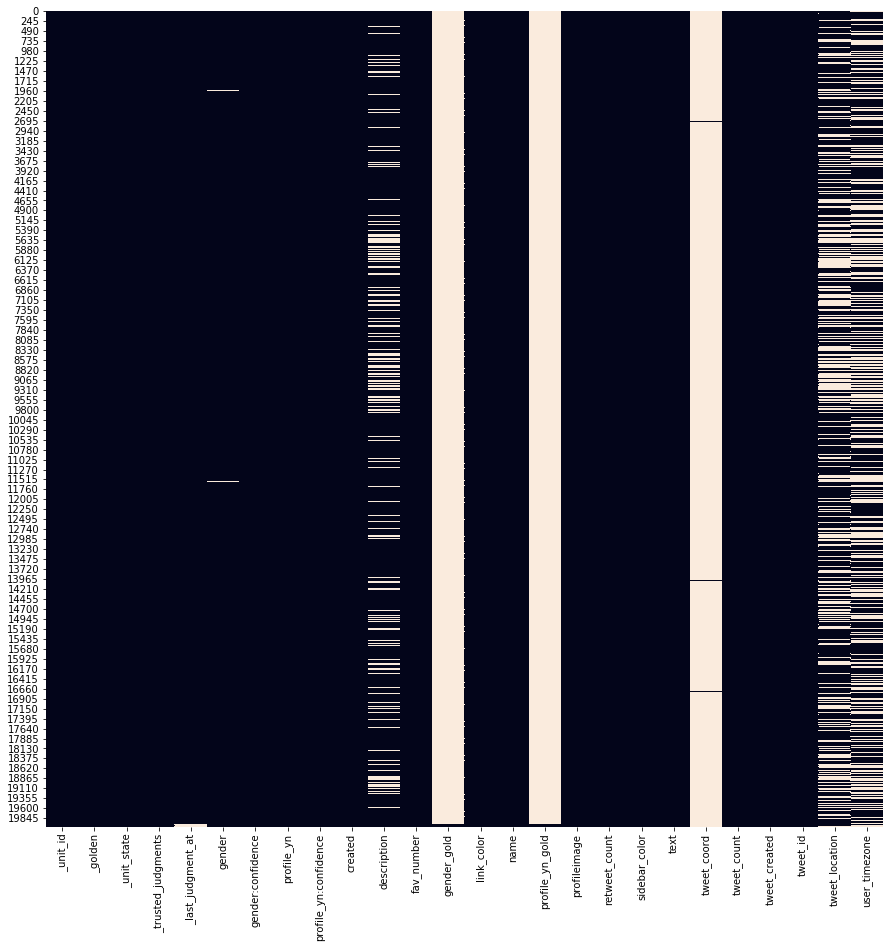

In [12]:
# Visualizing null values to get a better idea of the dataset & it's trends

plt.subplots(figsize=(15,15))
sns.heatmap(twitter.isnull(), cbar=False)

## __Data Exploration & Feature Engineering__
Here we are going to explore the relationships of the independent and dependent variables, modify the features and look for anomalies to present a better dataset for the ML models.

As by observing the above representations
We will reduce down to only the following columns which are required for ML algorithm implimentation :

   1. 'gender'
   2. 'link_color'
   3. 'sidebar_color'
   4. 'text'
   4. 'description'

In [13]:
#Dropping irrelevant columns from dataset

twitter = twitter.drop(['_unit_id', '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [14]:
# dropping all the null values from 'gender'

twitter = twitter.dropna(subset=['gender'],how ='any')  
twitter.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


In [15]:
twitter['gender'].value_counts(dropna=False) 

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

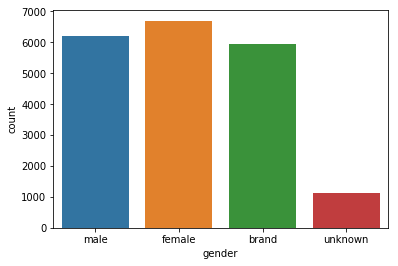

In [16]:
#visualising the gender counts

sns.countplot(twitter['gender'],label="Gender")

In [17]:
#getting rid of the unknown column

drop_items_idx = twitter[twitter['gender'] == 'unknown'].index

twitter.drop (index = drop_items_idx, inplace = True)

twitter['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

### __Text Analysis :__

In [18]:
# As we saw from the heatmap, that there are multiple NaN values in the description column

twitter = twitter.dropna(subset=['description'],how ='any')  

In [19]:
# Identifying the most commonly used words in "text"

common_text = Counter()
for common in twitter['text']:
    for word in common.split(' '):
        common_text[word] += 1
        

common_text.most_common(20)

[('the', 9759),
 ('and', 9243),
 ('to', 4840),
 ('I', 3894),
 ('a', 3564),
 ('of', 3215),
 ('in', 2629),
 ('you', 2607),
 ('for', 2556),
 ('is', 2245),
 ('The', 1842),
 ('on', 1813),
 ('my', 1593),
 ('', 1411),
 ('it', 1382),
 ('with', 1312),
 ('that', 1242),
 ('me', 1159),
 ('at', 1094),
 ('be', 1053)]

In [20]:
# Identifying the most commonly used words in "description"

common_desc = Counter()
for common in twitter['description']:
    for word in common.split(' '):
        common_desc[word] += 1
        
common_desc.most_common(20)

[('', 5092),
 ('and', 4982),
 ('the', 3961),
 ('of', 3300),
 ('a', 2874),
 ('to', 2857),
 ('I', 2333),
 ('for', 2152),
 ('|', 2147),
 ('in', 2008),
 ('&', 1976),
 ('is', 1699),
 ('my', 1560),
 ('you', 1228),
 ('on', 1068),
 ('with', 991),
 ('-', 930),
 ('The', 920),
 ('at', 830),
 ('your', 687)]

### Text cleaning
In this phase, we will be removing special characters and "trash" filtering out text and perform other functions like Tokenizing, Lemmatizing etc

In [21]:
# Merging the 'text' & 'description' to combine all sorts of text and then find out common words

twitter['text_description'] = twitter['text'].str.cat(twitter['description'], sep=' ')

In [22]:
twitter.columns

Index(['gender', 'description', 'link_color', 'sidebar_color', 'text',
       'text_description'],
      dtype='object')

In [23]:
twitter['text_description'].head()

0    Robbie E Responds To Critics After Win Against...
1    ÛÏIt felt like they were my friends and I was...
2    i absolutely adore when louis starts the songs...
3    Hi @JordanSpieth - Looking at the url - do you...
4    Watching Neighbours on Sky+ catching up with t...
Name: text_description, dtype: object

In [24]:
def cleaning(i):
    i = re.sub("[^a-zA-Z]"," ", str(i))                # regex to clean unnecesarry chars
    i = i.replace("co","")                             # deleting links/others
    i = i.replace("http","")
    i = i.lower()                                      # lowercase all

    return i

In [25]:
twitter['text_description'] = [cleaning(i) for i in twitter['text_description']]
twitter['text_description'].head()

0    robbie e responds to critics after win against...
1       it felt like they were my friends and i was...
2    i absolutely adore when louis starts the songs...
3    hi  jordanspieth   looking at the url   do you...
4    watching neighbours on sky  catching up with t...
Name: text_description, dtype: object

 This process of reducing a word to its root is called stemming. An alternative way is called Lemmatization.<br>
 Here we will take use of Lemmatization.<br>
 (https://miro.medium.com/max/2050/1*ES5bt7IoInIq2YioQp2zcQ.png)

In [27]:
import nltk as nlp
lemma = nlp.WordNetLemmatizer()  
def finalizing(i):
        i = nlp.word_tokenize(i)                                                   # splitting words by tokenzing
        i = [lemma.lemmatize(word) for word in i]                                  # playing -> play
        i = " ".join(i)                                                            # make them one string again
        
        return i

In [28]:
twitter['text_description'] = [finalizing(i) for i in twitter['text_description']]

In [29]:
# Most commonly used words used in combined 'text' & 'description'

from collections import Counter
words = Counter()
for twit in twitter['text_description']:
    for x in twit.split(' '):
        words[x] += 1

words.most_common(25)

[('the', 17210),
 ('and', 15520),
 ('s', 11406),
 ('t', 11004),
 ('i', 10115),
 ('a', 8584),
 ('to', 8117),
 ('of', 6925),
 ('you', 5511),
 ('in', 5196),
 ('for', 5121),
 ('is', 4324),
 ('my', 3811),
 ('it', 3802),
 ('on', 3257),
 ('me', 2924),
 ('with', 2477),
 ('m', 2462),
 ('that', 2362),
 ('at', 2102),
 ('be', 1945),
 ('your', 1934),
 ('all', 1882),
 ('are', 1836),
 ('love', 1746)]

In [30]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
words_filtered = Counter()
for x, y in words.items():
    if x not in stopwords:
        words_filtered[x]=y

words_filtered.most_common(25)

[('love', 1746),
 ('like', 1358),
 ('get', 1301),
 ('u', 1226),
 ('one', 1142),
 ('life', 1072),
 ('wa', 1047),
 ('time', 1020),
 ('day', 908),
 ('new', 892),
 ('make', 829),
 ('news', 814),
 ('best', 750),
 ('go', 736),
 ('people', 727),
 ('world', 694),
 ('follow', 691),
 ('know', 685),
 ('music', 682),
 ('thing', 656),
 ('year', 620),
 ('good', 613),
 ('fan', 599),
 ('want', 594),
 ('tweet', 573)]

## <u>__Answer 1__ : The most used words by the users are words like Love, Like, Life, Time etc </u>

## __Training & Testing of ML algorithms__
The following classifiers have been chosen for training on the dataset :-

    1. Logistic Regression
    2. Random forest
    3. SVM Classifier

The ML algorithms are trained on each feature of the dataset and the algorithm with the maximum accuracy is the most optimal model for this dataset and the feature that gives maximum accuracy is the optimal feature for classification of this data.

In [31]:
# The frequency of the words will be helpful in classifying the gender of the users.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Setting up training and testing data 
encoder = LabelEncoder()

y = encoder.fit_transform(twitter['gender'])
X = twitter['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [32]:
y[0:10]

array([2, 2, 2, 2, 1, 1, 0, 2, 1, 1])

TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.<br>
It evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

#### Modelling on Logistic Regression >>>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer()
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.6252952544556581


#### Modelling on Random Forest >>>

In [35]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer()
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.5640970581919691


#### Modelling on SVM >>>

In [36]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer()
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.6152029203349796


### __Experimental Results__ :

Accuracy:

    Logistic Regression: 62.52%
    Random Forest: 56.40%
    SVM: 61.52%



# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

## __Color attribute analysis :__

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' '0']


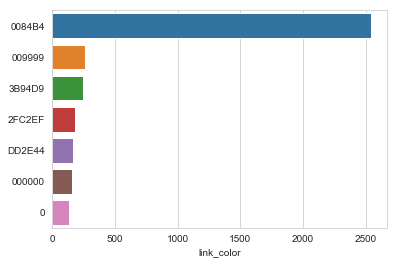

In [37]:
male_link_color = twitter[twitter['gender'] == 'male']['link_color'].value_counts().head(7)
male_link_color_idx = male_link_color.index
male_top_color = male_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_link_color, y = male_link_color_idx)

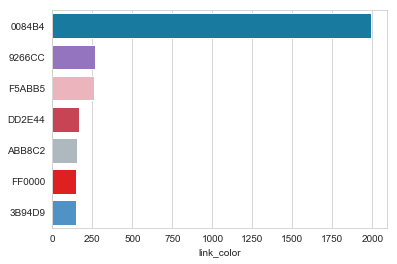

In [38]:
female_link_color = twitter[twitter['gender'] == 'female']['link_color'].value_counts().head(7)
female_link_color_idx = female_link_color.index
female_top_color = female_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_link_color, y = female_link_color_idx, palette=list(map(l, female_top_color)))

As seen from plots displayed above, most users have not changed the default color of their profile, but if these are discarded, then there is significant dataset to be used for classification.

## <u>__Answer 2__ : The most primiarly used color for 'link color' is Blue followed by Orange and the rest of them. </u>